In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#LOADING DATASET AND VIEWING THE FIRST 5 ROWS
df=pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
#DATSET INFO; SHAPE, DESCRIPTION, INFO, MISSING VALUES

In [4]:
df.shape

(32581, 12)

In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
#DROPPING DUPLICATES
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].mean)
df['person_emp_length']=df['person_emp_length'].fillna(df['person_emp_length'].mean)

In [10]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [11]:
#UNIQUE VALUE COUNTS OF HOME OWNERSHIP
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: count, dtype: int64

In [12]:
#UNIQUE VALUE COUNTS OF LOAN INTENT
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64

In [13]:
#UNIQUE VALUE COUNTS OF LOAN GRADE
df['loan_grade'].value_counts()

loan_grade
A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: count, dtype: int64

In [14]:
#UNIQUE VALUE COUNTS OF PERSON LOAN DEFAULT
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26686
Y     5730
Name: count, dtype: int64

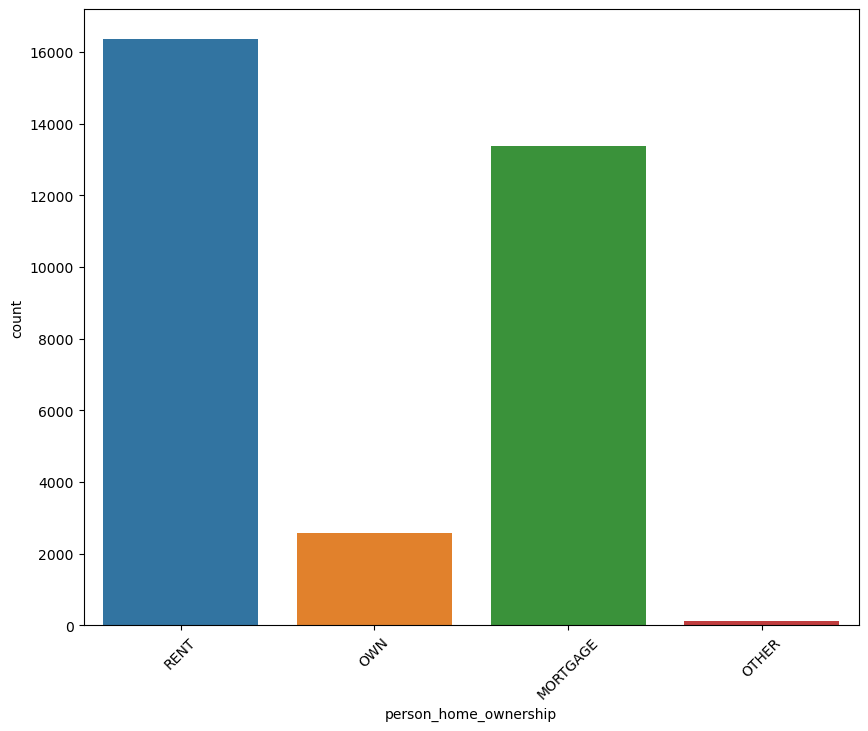

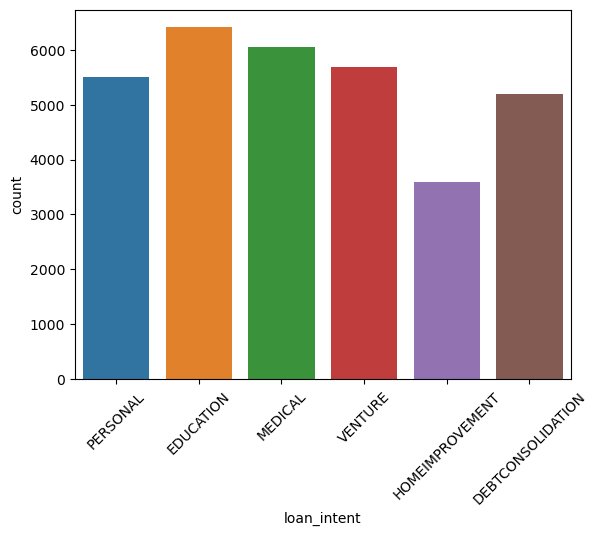

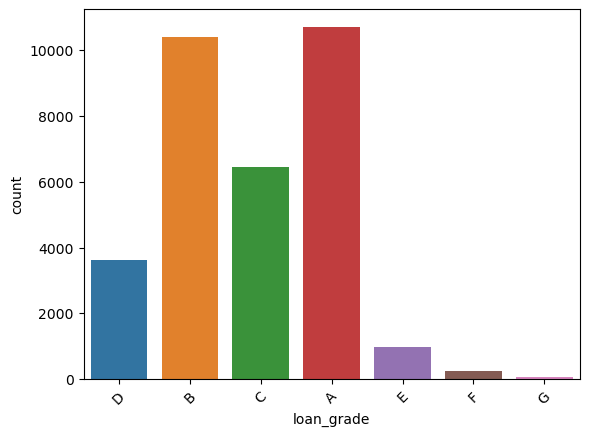

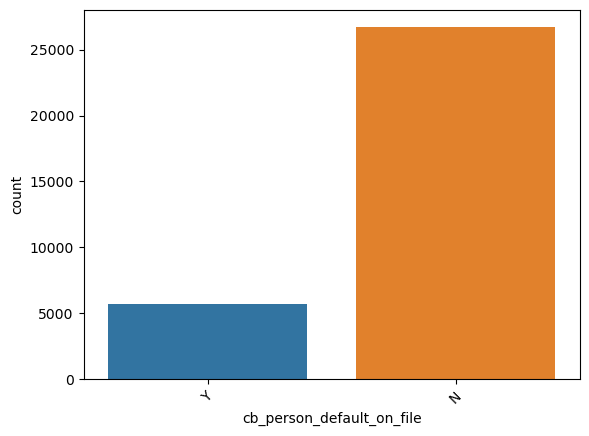

In [15]:
#VISUALIZATION FOR CATEGORICAL COLUMNS
plt.figure(figsize=(10, 8))
for col in ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]:
    sns.countplot(data= df, x=col, hue=col)
    plt.xticks(rotation= 45)
    plt.show()

In [16]:
#DISTRIBUTION VISUALIZATION OF THE DATASET
def distplots(col):
    sns.distplot(df[col])
    plt.show()

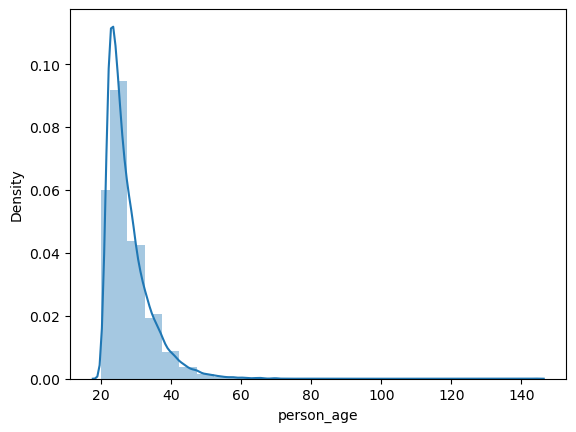

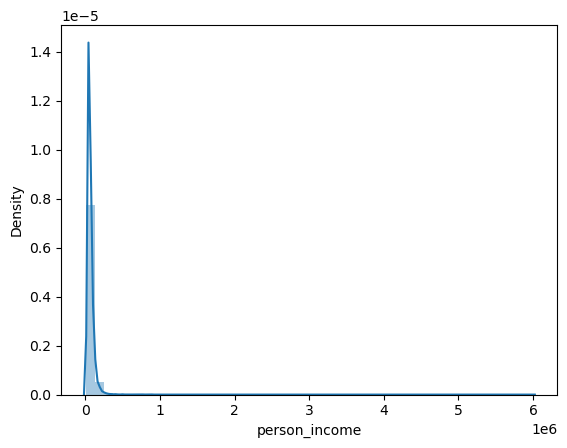

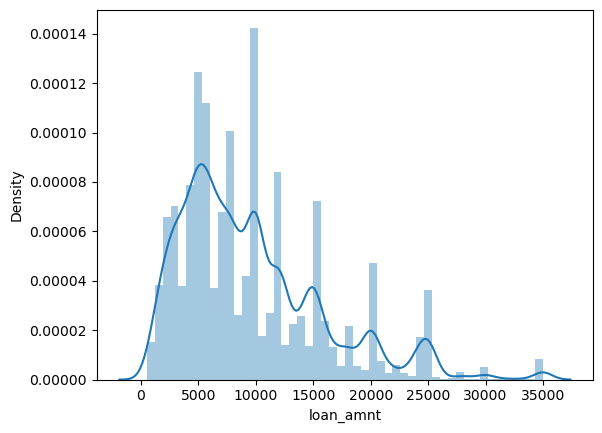

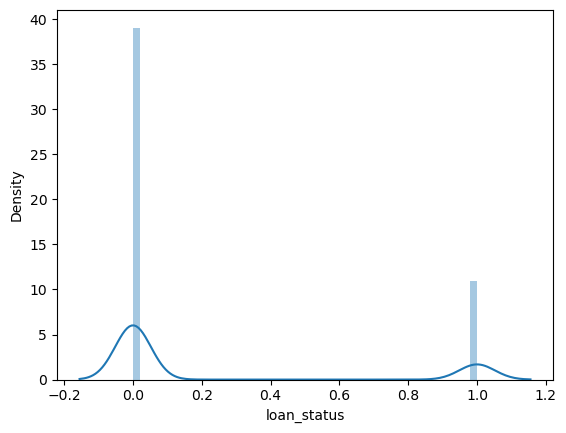

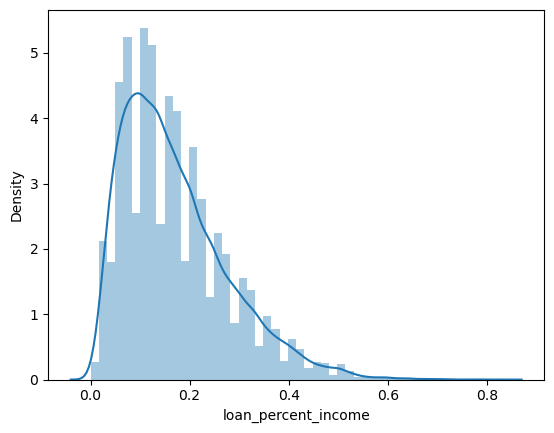

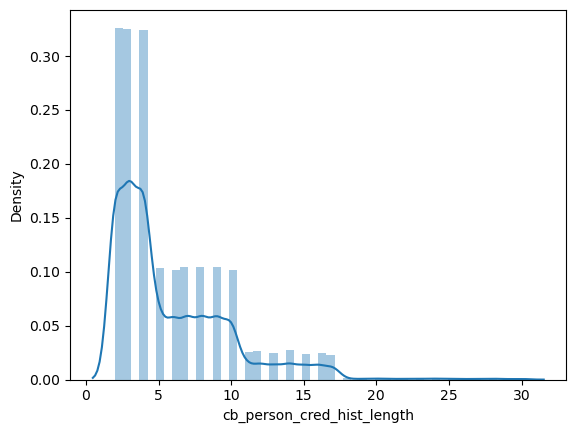

In [17]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

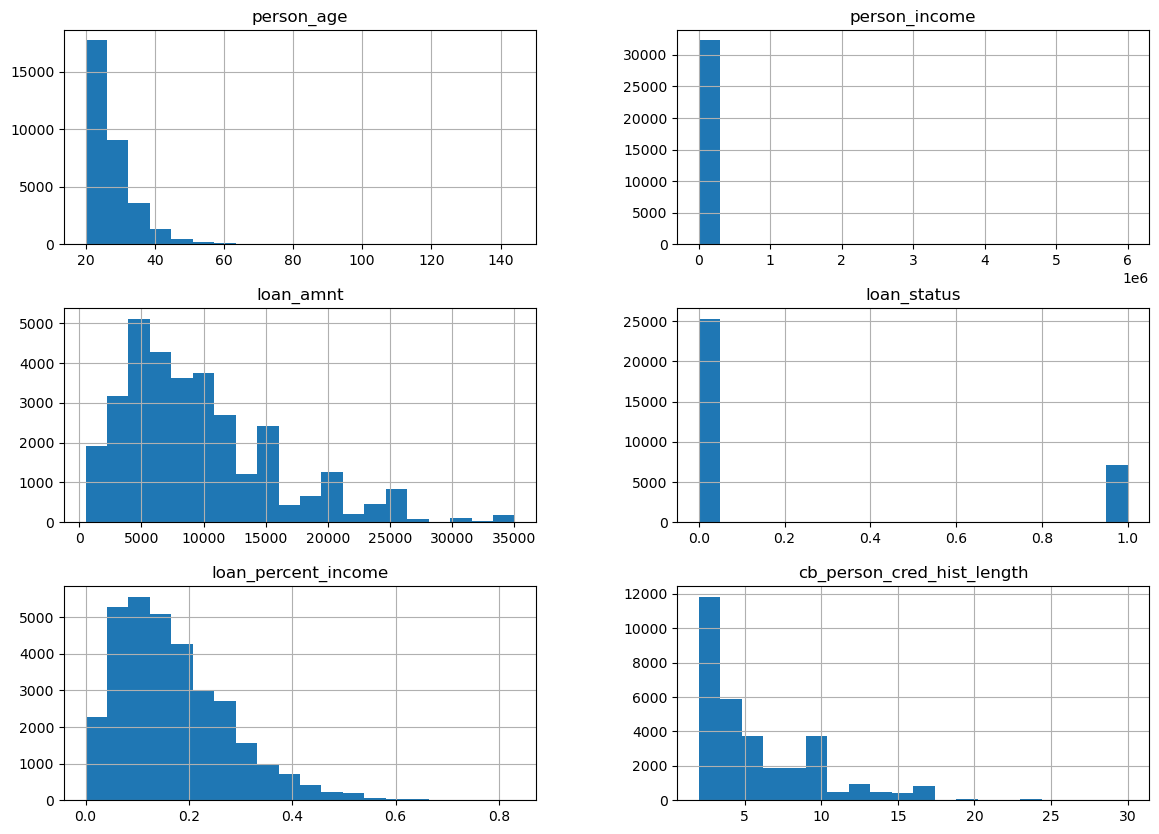

In [18]:
#HISPLOT OF THE DATASET
df.hist(bins=20, figsize=(14, 10))
plt.show()

CATEGORICAL COLUMNS IN RELATION TO LOAN STATUS AND THEIR VISUALIZATION

In [19]:
df.groupby('cb_person_default_on_file')['loan_status'].value_counts()

cb_person_default_on_file  loan_status
N                          0              21767
                           1               4919
Y                          0               3560
                           1               2170
Name: count, dtype: int64

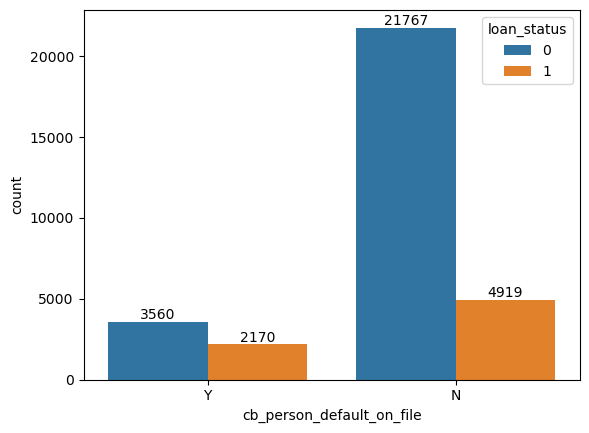

In [20]:
ax=sns.countplot(df, x='cb_person_default_on_file', hue='loan_status')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()    

In [21]:
df.groupby('loan_intent')['loan_status'].value_counts()

loan_intent        loan_status
DEBTCONSOLIDATION  0              3701
                   1              1488
EDUCATION          0              5305
                   1              1106
HOMEIMPROVEMENT    0              2654
                   1               940
MEDICAL            0              4425
                   1              1617
PERSONAL           0              4404
                   1              1094
VENTURE            0              4838
                   1               844
Name: count, dtype: int64

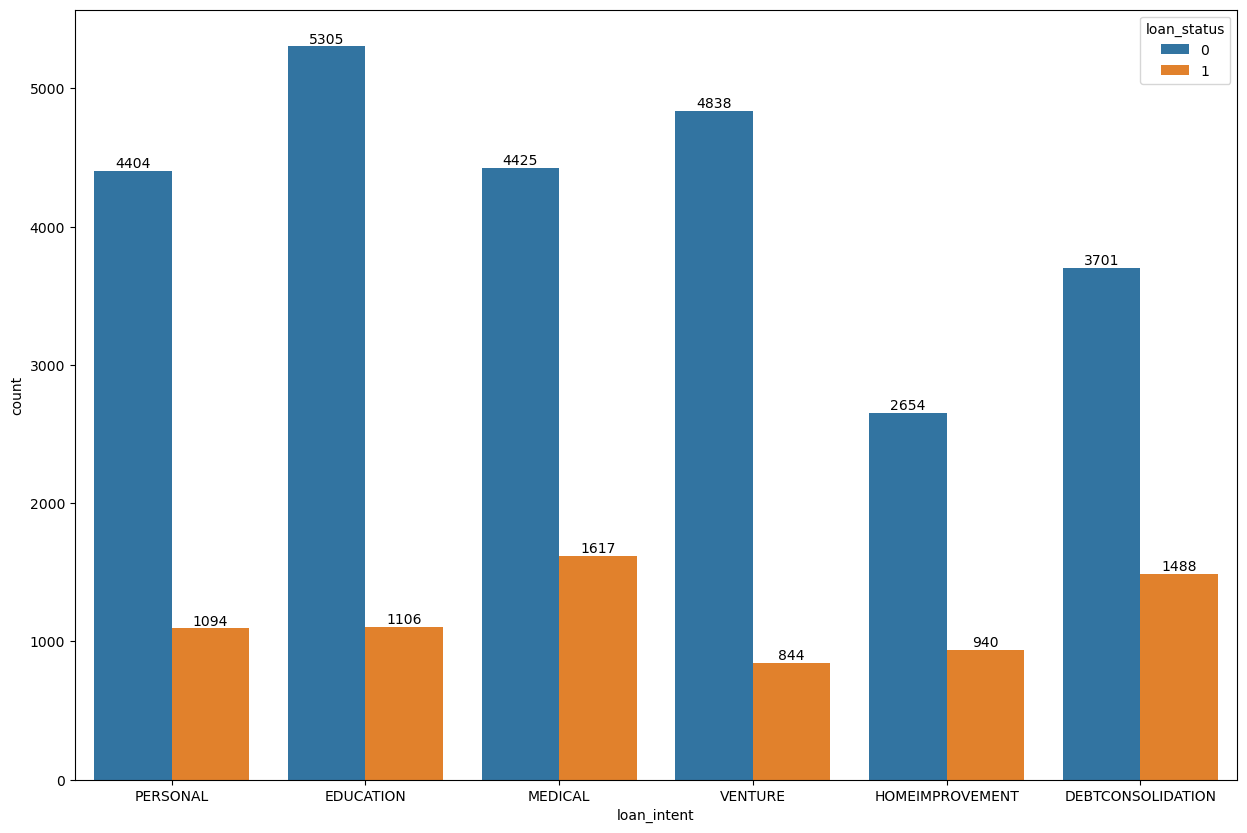

In [22]:
plt.figure(figsize=(15,10))
ax=sns.countplot(df, x='loan_intent', hue='loan_status')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()    

In [23]:
df.groupby('person_home_ownership')['loan_status'].value_counts()  

person_home_ownership  loan_status
MORTGAGE               0              11682
                       1               1687
OTHER                  0                 73
                       1                 33
OWN                    0               2371
                       1                192
RENT                   0              11201
                       1               5177
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

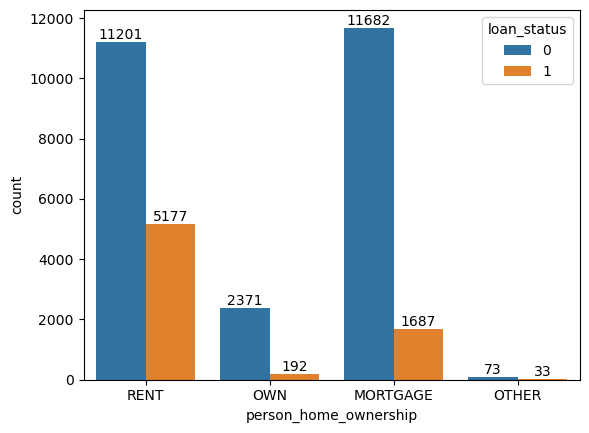

In [24]:
ax=sns.countplot(df, x='person_home_ownership', hue='loan_status' )
for bars in ax.containers:
    ax.bar_label(bars)
plt.show

In [25]:
df.groupby('loan_grade')['loan_status'].value_counts()

loan_grade  loan_status
A           0              9637
            1              1066
B           0              8692
            1              1695
C           0              5102
            1              1336
D           1              2138
            0              1482
E           1               621
            0               342
F           1               170
            0                71
G           1                63
            0                 1
Name: count, dtype: int64

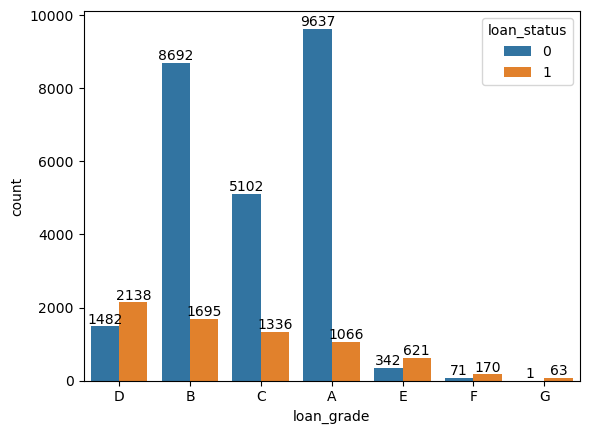

In [26]:
ax=sns.countplot(df, x='loan_grade', hue='loan_status')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()    

In [27]:
#ENCODING THE CATEGORICAL COLUMNS
from sklearn.preprocessing import LabelEncoder
enco=LabelEncoder()
df['person_home_ownership']=enco.fit_transform(df['person_home_ownership'])
df['loan_grade']=enco.fit_transform(df['loan_grade'])
df['loan_intent']=enco.fit_transform(df['loan_intent'])
df['cb_person_default_on_file']=enco.fit_transform(df['cb_person_default_on_file'])

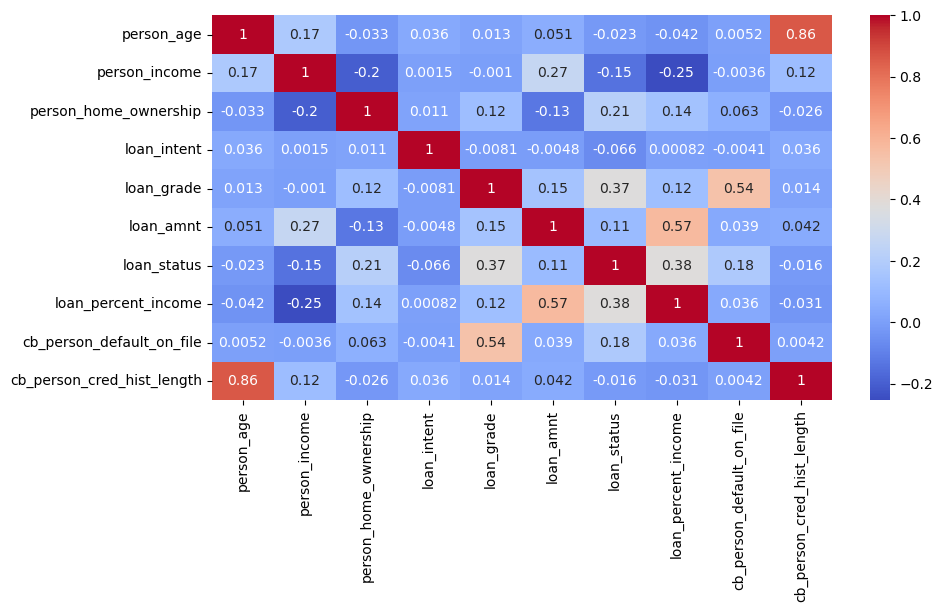

In [28]:
#CORRELATION OF THE COLUMNS IN THE DATASET
plt.figure(figsize=(10, 5))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.show()

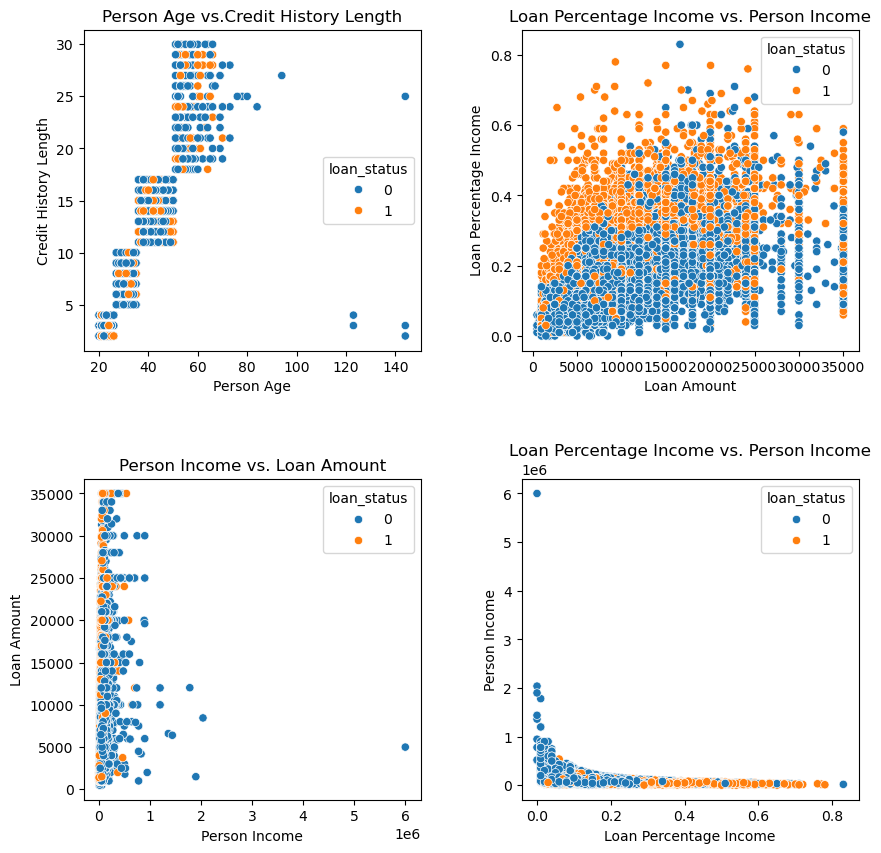

In [29]:
#Scatterplots for the correlating variables:

fig,axes =plt.subplots(2,2,figsize=(10,10))
x_labels=["Person Age","Loan Amount", "Person Income", "Loan Percentage Income"]
y_labels=["Credit History Length","Loan Percentage Income", "Loan Amount", "Person Income"]
titles=["Person Age vs.Credit History Length","Loan Percentage Income vs. Person Income", "Person Income vs. Loan Amount","Loan Percentage Income vs. Person Income"]
ax=[axes[0,0],axes[0,1],axes[1,0],axes[1,1]]
x =["person_age","loan_amnt","person_income","loan_percent_income"]
y=["cb_person_cred_hist_length","loan_percent_income","loan_amnt","person_income"]

for i in range(len(x_labels)):
    sns.scatterplot(x = x[i], y=y[i], data = df, hue = "loan_status", ax = ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel(x_labels[i])
    ax[i].set_ylabel(y_labels[i])
    
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

CHOOSING THE DEPENDENT AND INDEPENDENT VARIABLES, SCALING THE DATASET, TRAINING AND TESTING THE DATASET

In [30]:
x=df.drop(columns=['loan_status','person_emp_length','loan_int_rate'], axis=1)
y=df['loan_status']

In [31]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
x=sca.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=4)

RANDOM FOREST MODEL

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [35]:
yhat_train_rfc=rfc.predict(x_train)
yhat_test_rfc=rfc.predict(x_test)

In [36]:
print(classification_report(y_train, yhat_train_rfc))
print()
print(classification_report(y_test, yhat_test_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20293
           1       1.00      1.00      1.00      5639

    accuracy                           1.00     25932
   macro avg       1.00      1.00      1.00     25932
weighted avg       1.00      1.00      1.00     25932


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5034
           1       0.91      0.71      0.80      1450

    accuracy                           0.92      6484
   macro avg       0.91      0.84      0.87      6484
weighted avg       0.92      0.92      0.92      6484



In [37]:
# RANDOM FOREST MODEL HAS AN ACCURACY OF 92%

In [38]:
print(confusion_matrix(y_train, yhat_train_rfc))
print()
print(confusion_matrix(y_test, yhat_test_rfc))

[[20293     0]
 [    2  5637]]

[[4930  104]
 [ 422 1028]]


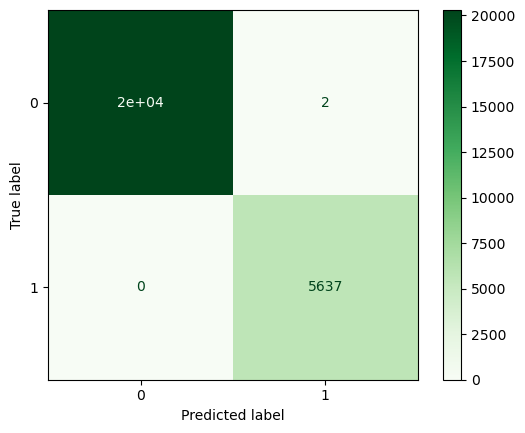

In [39]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_rfc, y_train))
c_matrix.plot(cmap='Greens')


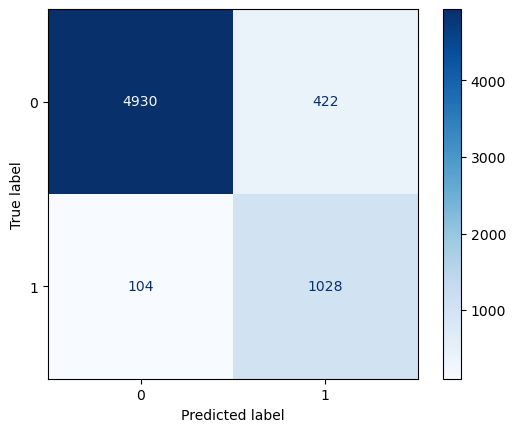

In [40]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_rfc, y_test))
c_matrix.plot(cmap='Blues')

LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train, y_train)

LogisticRegression()

In [42]:
yhat1_train_lreg=lreg.predict(x_train)
yhat1_test_lreg=lreg.predict(x_test)

In [43]:
print(classification_report(y_train, yhat1_train_lreg))
print()
print(classification_report(y_test, yhat1_test_lreg))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     20293
           1       0.73      0.46      0.57      5639

    accuracy                           0.85     25932
   macro avg       0.80      0.71      0.74     25932
weighted avg       0.84      0.85      0.83     25932


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5034
           1       0.72      0.47      0.57      1450

    accuracy                           0.84      6484
   macro avg       0.79      0.71      0.73      6484
weighted avg       0.83      0.84      0.83      6484



#LOGISTIC REGRESSION HAS AN ACCURACY OF 84%

In [44]:
print(confusion_matrix(y_train, yhat1_train_lreg))
print()
print(confusion_matrix(y_test, yhat1_test_lreg))

[[19327   966]
 [ 3018  2621]]

[[4765  269]
 [ 770  680]]


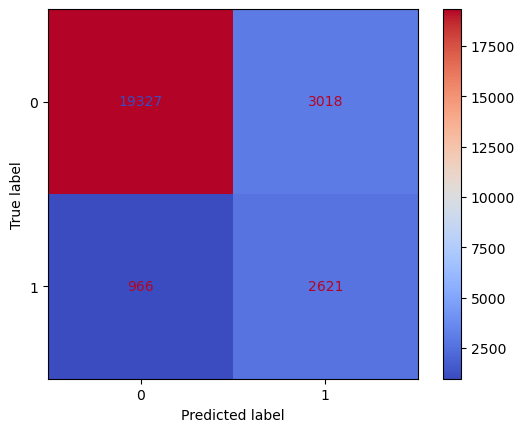

In [45]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat1_train_lreg, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

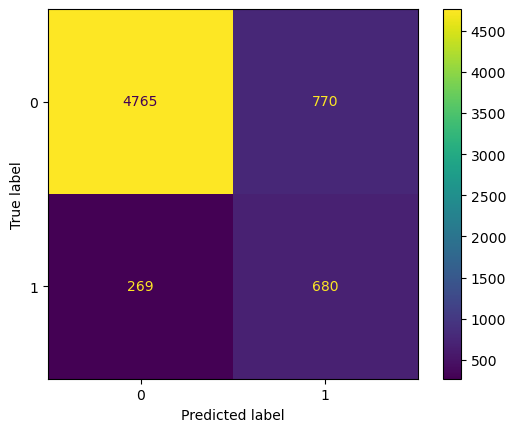

In [46]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat1_test_lreg, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

BAGGING CLASSIFIER MODEL

In [47]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier()
bg.fit(x_train, y_train)

BaggingClassifier()

In [48]:
yhat2_train_bg=bg.predict(x_train)
yhat2_test_bg=bg.predict(x_test)

In [49]:
print(classification_report(y_train, yhat2_train_bg))
print()
print(classification_report(y_test, yhat2_test_bg))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     20293
           1       1.00      0.95      0.98      5639

    accuracy                           0.99     25932
   macro avg       0.99      0.98      0.98     25932
weighted avg       0.99      0.99      0.99     25932


              precision    recall  f1-score   support

           0       0.92      0.98      0.94      5034
           1       0.89      0.69      0.78      1450

    accuracy                           0.91      6484
   macro avg       0.90      0.83      0.86      6484
weighted avg       0.91      0.91      0.91      6484



In [50]:
#BAGGING MODEL HAS AN ACCURACY OF 91%

In [51]:
print(confusion_matrix(y_train, yhat2_train_bg))
print()
print(confusion_matrix(y_test, yhat2_test_bg))

[[20284     9]
 [  266  5373]]

[[4909  125]
 [ 447 1003]]


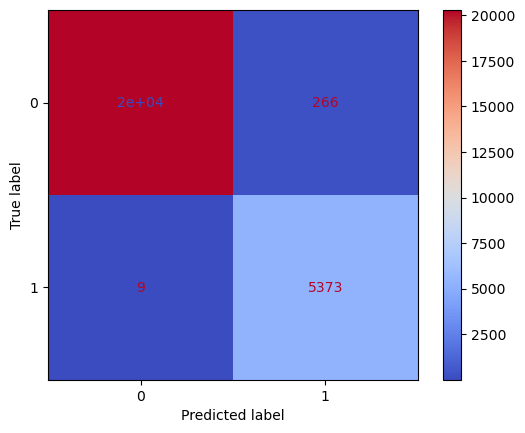

In [52]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat2_train_bg, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

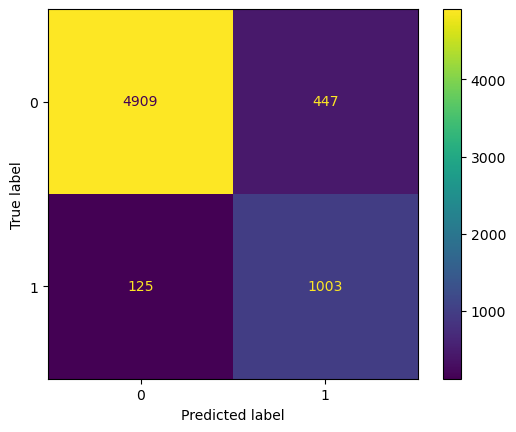

In [53]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat2_test_bg, y_test))
c_matrix.plot(cmap='viridis')
plt.show()